In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/agnie/Python Project/Churn_Modelling.csv')#importowanie danych z pliku .csv
df.head() #sprawdzenie pierwszych pięciu wierszy zbioru danych

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info() #sprawdzenie liczebności zbioru, braków danych i typów zmiennych
#stan wiedzy na ten moment: 
#zmienne Geography, Gender, Age mają braki danych
#RowNumber do usunięcia
#sprawdzić ile różnych krajów jest do wyboru i jak te kategorie są liczne - rozstrzygnąć czy ta zmienna jest potrzebna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        9984 non-null   object 
 3   Gender           9985 non-null   object 
 4   Age              9963 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe() 
#sprawdzenie podstawowych statystyk dla zmiennych ilościowych
#nie widać jakiś dramatycznych odchyleń,
#

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,9963.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.924320,5.012800,76485.889288,1.530200,0.70550,0.515100,100092.387723,0.203700
std,2886.89568,96.653299,10.490246,2.892174,62397.405202,0.581654,0.45584,0.499797,57507.155790,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,90.070000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()#nie było żadnych duplikatów, ale lepiej się upewnić

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        9984 non-null   object 
 3   Gender           9985 non-null   object 
 4   Age              9963 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.6+ KB


In [7]:
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe()
#zmienne zero-jedynkowe to HasCrdCard, IsActiveMember, Exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,9963.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924320,5.012800,76485.889288,1.530200,0.70550,0.515100,100092.387723,0.203700
std,96.653299,10.490246,2.892174,62397.405202,0.581654,0.45584,0.499797,57507.155790,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,90.070000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include='O')
#i Geography i Gender mają braki danych - uzupełnić je dominantą?
#Geography ma 3 unikalne wartości, więc można zostawić
#tak naprawdę zmienna Geography i NumOfProducts to zmienne kategoryczne

,Geography,Gender
count,9984,9985
unique,3,2
top,France,Male
freq,5008,5447


In [10]:
df['Exited'].value_counts() #spośród 10000 obserwacji, 2037 to osoby, które zdecydowały się odejść z banku

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df[['Geography','Exited']].groupby(['Geography']).mean().sort_values(by='Exited', ascending=False)
#największe ryzyko odejścia z banku jest wśród osób pochodzących z Niemiec

,Exited
Geography,
Germany,0.324163
Spain,0.166126
France,0.161342


In [12]:
df.groupby(['Gender']).Exited.mean() 
#większe prawdopodobieństwo odejścia z banku jest w przypadku gdy klientem jest kobieta

Gender
Female    0.250771
Male      0.164678
Name: Exited, dtype: float64

In [13]:
df[['NumOfProducts','Exited']].groupby(['NumOfProducts'])[['Exited']].agg(['count','sum','mean'])
#100% osób które miało 4 produkty odeszło z banku, trochę to wbrew intuicji, 
#bo jednak według mojej intuicji im więcej produktów w posiadaniu tym mniejsza szansa na odejście
#jednak jest to też bardzo mało liczna grupa - do przemyślenia, 
#czy to będzie wpływało na wyniki modelu i czy nie zastanowić się nad stworzeniem kategorii >=3 

Exited                
               count   sum      mean
NumOfProducts                       
1               5084  1409  0.277144
2               4590   348  0.075817
3                266   220  0.827068
4                 60    60  1.000000

In [14]:
pd.pivot_table(df,
              index = 'Gender',
              columns = 'Geography',
              values = 'Exited',
              aggfunc = 'mean')
#jeśli klient jest kobietą i pochodzi z Niemiec to ma 37% szans na to, że opuści bank
#najmniejsze prawdopodobieństwo odejścia z banku jest wśród mężczyzn z Francji

Geography,France,Germany,Spain
Gender,,,
Female,0.203285,0.374475,0.211645
Male,0.127094,0.278327,0.130970


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

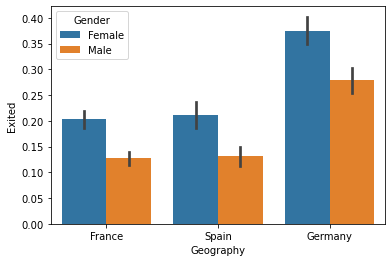

In [15]:
sns.barplot(x='Geography', y='Exited', data=df, hue='Gender') 
#analizując dane z wykresu poniżej, można dojść do podobnych wniosków co powyżej

(array([ 607., 2172., 3618., 1862.,  825.,  520.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

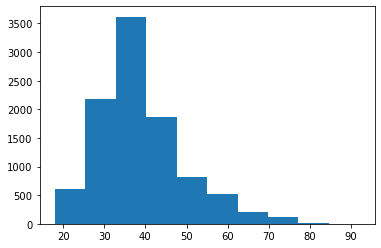

In [16]:
plt.hist(df['Age']) 
#histogram wieku pokazuje nam, że jest asymetria w rozkładzie tej zmiennej, należy zbadać jak silna ona jest

In [17]:
df['Age'].skew()
#współczynnik skośności rozkładu jest ok 1, więc jest to zastanawiające, 
#jednak poczekam z decyzją jak uzupełnić dane do momentu aż podzielę zbiory


1.0136349257617514

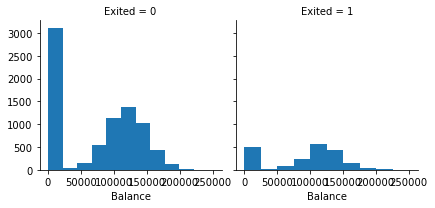

In [18]:
mapa = sns.FacetGrid(df, col='Exited')
mapa.map(plt.hist, 'Balance')
plt.show()
#zmienna Balance w obu grupach przyjmuje rozkład zbliżony do normalnego,
#z dużą liczbą obserwacji dla bilansu konta = 0

In [19]:
df['Balance'].skew() #współczynnik skośności na poziomie -0.14 nie wskazuje na to, żeby asymetria była znacząca

-0.14110871094154384

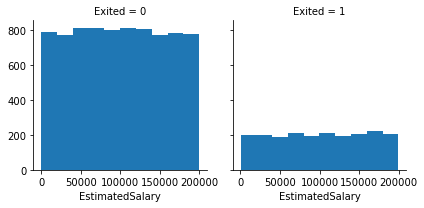

In [20]:
mapa = sns.FacetGrid(df, col='Exited')
mapa.map(plt.hist, 'EstimatedSalary')
plt.show()
#wygląda na to, że estymowane dochody klientów nie mają znaczenia, jeśli chodzi o odejście z banku
#liczba osób, które nie odeszły z banku to zarówno osoby zarabiające mało, średnio i dużo, 
#tak samo wygląda sytuacja wśród osób które odeszły z banku
#czy w takim przypadku można byłoby wyrzucić tą zmienną? Czy to zbyt słaba przesłanka?

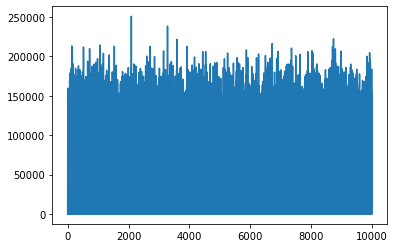

In [21]:
plt.plot(df['Balance']) 
#chciałam upewnić się na wykresie, czy żadna z wartości nie odznacza się znacząco, 
#ale wszystkie wydają się trzymać w jakimś przedziale wartości

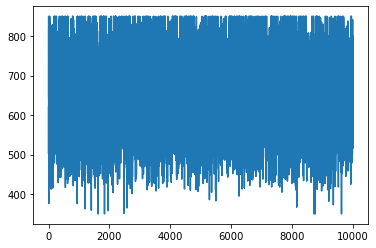

In [22]:
plt.plot(df['CreditScore'])
#chciałam upewnić się na wykresie, czy żadna z wartości nie odznacza się znacząco, 
#ale wszystkie wydają się trzymać w jakimś przedziale wartości

In [23]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0}) #zamiana zmiennej Gender na zmienną zero-jedynkową

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Exited', axis=1) #zmienne objaśniające to wszystkie kolumny zbioru oprócz Exited
y = df['Exited'] #zmienna objaśniana 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #podział zbioru na testowy i treningowy

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9232 to 1146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        6989 non-null   object 
 2   Gender           6989 non-null   float64
 3   Age              6978 non-null   float64
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 601.6+ KB


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1603 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3000 non-null   int64  
 1   Geography        2995 non-null   object 
 2   Gender           2996 non-null   float64
 3   Age              2985 non-null   float64
 4   Tenure           3000 non-null   int64  
 5   Balance          3000 non-null   float64
 6   NumOfProducts    3000 non-null   int64  
 7   HasCrCard        3000 non-null   int64  
 8   IsActiveMember   3000 non-null   int64  
 9   EstimatedSalary  3000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 257.8+ KB


In [29]:
X_train['Gender'].value_counts().sort_values(ascending=False).index[0]

1.0

In [30]:
X_train['Gender'].fillna(X_train['Gender'].value_counts().sort_values(ascending=False).index[0], inplace=True) 
#uzupełniam braki danych w zbiorze treningowym dominantą zmiennej Gender ze zbioru treningowego 

In [31]:
X_test['Gender'].fillna(X_train['Gender'].value_counts().sort_values(ascending=False).index[0], inplace=True)
#uzupełniam braki danych w zbiorze testowym dominantą zmiennej Gender ze zbioru treningowego 

In [32]:
X_train['Geography'].value_counts().sort_values(ascending=False).index[0]

'France'

In [33]:
X_train['Geography'].fillna(X_train['Geography'].value_counts().sort_values(ascending=False).index[0], inplace=True) 
##uzupełniam braki danych w zbiorze treningowym dominantą zmiennej Geography ze zbioru treningowego 
X_test['Geography'].fillna(X_train['Geography'].value_counts().sort_values(ascending=False).index[0], inplace=True)
##uzupełniam braki danych w zbiorze testowym dominantą zmiennej Geography ze zbioru treningowego 

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9232 to 1146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   object 
 2   Gender           7000 non-null   float64
 3   Age              6978 non-null   float64
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 601.6+ KB


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1603 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3000 non-null   int64  
 1   Geography        3000 non-null   object 
 2   Gender           3000 non-null   float64
 3   Age              2985 non-null   float64
 4   Tenure           3000 non-null   int64  
 5   Balance          3000 non-null   float64
 6   NumOfProducts    3000 non-null   int64  
 7   HasCrCard        3000 non-null   int64  
 8   IsActiveMember   3000 non-null   int64  
 9   EstimatedSalary  3000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 257.8+ KB


In [36]:
X_train['Age'].skew()

1.0117466857936182

In [37]:
X_test['Age'].skew() #asymetria jest duża, więc jednak użyję mediany

1.018506750456528

In [38]:
X_train['Age'].median()

37.0

In [39]:
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)
#uzupełniam braki danych w zbiorze testowym medianą zmiennej Age w zbiorze treningowym

In [40]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
#uzupełniam braki danych w zbiorze treningowym medianą zmiennej Age w zbiorze treningowym

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9232 to 1146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   object 
 2   Gender           7000 non-null   float64
 3   Age              7000 non-null   float64
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 601.6+ KB


In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1603 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3000 non-null   int64  
 1   Geography        3000 non-null   object 
 2   Gender           3000 non-null   float64
 3   Age              3000 non-null   float64
 4   Tenure           3000 non-null   int64  
 5   Balance          3000 non-null   float64
 6   NumOfProducts    3000 non-null   int64  
 7   HasCrCard        3000 non-null   int64  
 8   IsActiveMember   3000 non-null   int64  
 9   EstimatedSalary  3000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 257.8+ KB


In [43]:
ohe_cols = ['Geography']
for i in ohe_cols:
    dummy = pd.get_dummies(X_train[i], prefix = i)
    dummy_test = pd.get_dummies(X_test[i], prefix = i)
    
    mask = str(X_train[i].value_counts().index[0])
    
    dummy.drop(i + '_' + mask, inplace=True, axis=1)
    dummy_test.drop(i + '_' + mask, inplace=True, axis=1)
    
    X_train = pd.concat([X_train,dummy], axis=1)
    X_test = pd.concat([X_test,dummy_test], axis=1)
    
    X_train.drop(i, inplace=True, axis=1)
    X_test.drop(i, inplace=True, axis=1)
#zamieniam kolumny ze zmiennymi kategorycznymi na kilka kolumn z wartościamy 0-1, czyli przeprowadzam 'one-hot encoding'
#następnie usuwam kolumnę, gdzie występuje dominanta oryginalnej zmiennej kategorycznej
#łączę zbiory i usuwam oryginalną zmienną kategoryczną

In [44]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9232,618,0.0,49.0,9,44301.43,3,1,1,89729.30,0,0
2210,673,0.0,34.0,1,127122.79,3,0,1,76703.10,1,0
3611,746,0.0,21.0,8,166883.07,2,0,1,194563.65,0,0
7095,753,0.0,38.0,1,117314.92,1,1,0,122021.33,1,0
6444,693,0.0,37.0,6,95900.04,1,1,1,38196.24,1,0


In [45]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
1603,576,0.0,36.0,8,166287.85,1,1,1,23305.85,1,0
8713,786,1.0,40.0,6,0.00,2,0,0,41248.80,0,1
4561,562,1.0,31.0,4,127237.25,2,0,1,143317.42,1,0
6600,505,0.0,36.0,2,79951.90,1,0,1,174123.16,0,0
2558,727,0.0,30.0,8,119027.28,2,1,1,137903.54,1,0


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(max_iter=1000)

In [48]:
logreg.fit(X_train, y_train) #dopasowuję model logistyczny do danych ze zbioru treningowego, czyli trenuję model

LogisticRegression(max_iter=1000)

In [49]:
logreg.score(X_test, y_test) #accuracy modelu, czyli model w 79,93% przypadków dobrze przewidział, czy osoba odejdzie z banku

0.7993333333333333

In [50]:
y_pred = logreg.predict(X_test) #prognoza wartości za pomocą modelu bazując na danych ze zbioru testowego

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confMetrics = confusion_matrix(y_test, y_pred)

In [54]:
y_pred.sum()

88

In [55]:
confMetrics = pd.DataFrame(confMetrics)
confMetrics.columns = [['Predicted 0', 'Predicted 1']]
confMetrics.index = [['True 0', 'True1']]
confMetrics
#macierz pomyłek mówi nam, że model w 2363 przypadkach przewidział wartość 0, gdy faktycznie taka była wartość
#w 53 przypadkach przwidział wartość 1, gdy faktyczna wartość to 0
#w 549 przypadkach przewidział wartość 0, gdy faktyczna wartość to 1
#i w 35 przypadkach przewidział wartość 1 gdy faktyczną wartością było 1

,Predicted 0,Predicted 1
True 0,2363,53
True1,549,35


In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_pred)) 
#bardzo zastanawiające jest to, że model ma bardzo małą poprawność przewidywania czy faktycznie dana osoba odejdzie z banku,
#czy to problem powstały przez błędy w przygotowaniu danych? czy po prostu kwestia samych danych które zostały zebrane?

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2416
           1       0.40      0.06      0.10       584

    accuracy                           0.80      3000
   macro avg       0.60      0.52      0.50      3000
weighted avg       0.73      0.80      0.73      3000

